#### Setting the environment

In [28]:
from Functions.gridFunctions import *
import pandas as pd
from google.oauth2 import service_account
from googleapiclient.discovery import build
import pandas as pd
from datetime import datetime, timedelta
from pathlib import Path




green_max  = "#196127"
green_more = "#239a3b"
green_less = "#7bc96f"
green_min  = "#c6e48b"

### Choose the art

#### Choose your vision style

In [29]:
theme = "dark"      # also "light" as option

#### Initialize a blank grid (53x7)

In [30]:
box_edge_color, box_blank_color = set_background(theme)
rows, cols = 7, 53

colors = [[box_blank_color for _ in range(cols)] for _ in range(rows)]

#### Choose Art & Colors

Grid saved as grid_output.png
Grid saved as grid_output.png


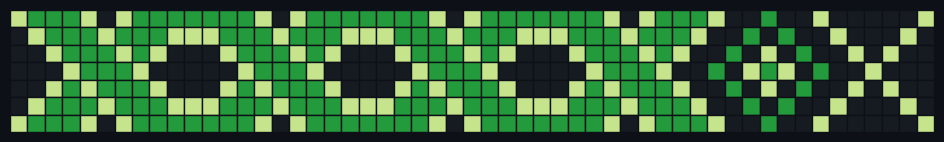

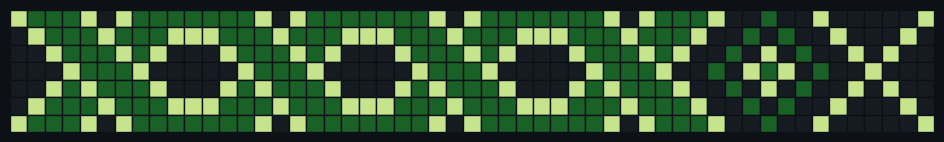

In [31]:
create_grid(art_num1(colors, green_min, green_more),box_edge_color)
create_grid(art_num1(colors, green_min, green_max),box_edge_color)

#### Create dataframe

In [32]:
art_df = generate_dataframe(colors,box_blank_color)
art_df

,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,...,W44,W45,W46,W47,W48,W49,W50,W51,W52,W53
Mon,2,8,8,8,2,0,2,8,8,8,...,8,0,0,2,0,0,0,0,0,2
Tue,0,2,8,8,8,2,8,8,8,2,...,0,8,0,0,2,0,0,0,2,0
Wed,0,0,2,8,8,8,2,8,2,0,...,2,0,8,0,0,2,0,2,0,0
Thu,0,0,0,2,8,8,8,2,0,0,...,8,2,0,8,0,0,2,0,0,0
Fri,0,0,2,8,2,8,8,8,2,0,...,2,0,8,0,0,2,0,2,0,0
Sat,0,2,8,8,8,2,8,8,8,2,...,0,8,0,0,2,0,0,0,2,0
Sun,2,8,8,8,2,0,2,8,8,8,...,8,0,0,2,0,0,0,0,0,2


### Google Calendar API

##### Set up Google Calendar API

In [33]:
current_working_directory = Path.cwd()
credentials_path = current_working_directory / 'credentials_jack.json' 


SCOPES = ['https://www.googleapis.com/auth/calendar']
SERVICE_ACCOUNT_FILE = credentials_path

##### Authenticate

In [34]:
credentials = service_account.Credentials.from_service_account_file(SERVICE_ACCOUNT_FILE, scopes=SCOPES)
service = build('calendar', 'v3', credentials=credentials)

MalformedError: The private_key field was not found in the service account info.

##### Specify calendar ID

In [ ]:
calendar_id = 'primary' # primary is the main calendar

##### Define starting date for scheduling

In [ ]:
start_date = datetime(2025, 1, 1) 

##### Loop through DataFrame and create events

In [ ]:
for week in range(df.shape[1]):
    for day_idx, day in enumerate(df.index):
        contribution_count = df.iloc[day_idx, week]
        event_date = start_date + timedelta(days=(week * 7 + day_idx))
        
        # Create event details
        event = {
            'summary': f'{contribution_count} GitHub Contributions',
            'start': {'date': event_date.strftime('%Y-%m-%d')},
            'end': {'date': event_date.strftime('%Y-%m-%d')},
            'description': f'Schedule {contribution_count} contributions for {day}',
        }
        
        # Add event to Google Calendar
        service.events().insert(calendarId=calendar_id, body=event).execute()

print("Contribution schedule added to Google Calendar!")